# Inverse Distance Weighting #

[Reference](https://en.wikipedia.org/wiki/Inverse_distance_weighting)

**Inverse distance weighting (IDW)** is a type of deterministic method for multivariate interpolation with a known scattered set of points. The assigned values to unknown points are calculated with a weighted average of the values available at the known points.

The name given to this type of methods was motivated by the weighted average applied, since it resorts to the inverse of the distance to each known point ("amount of proximity") when assigning weights.

A general form of finding an interpolated value $u$ at a given point $x$ based on samples $u_i = u(x_i)$ for $i=1,2,...,N$ using **IDW** is an interpolating function:

$$
u(x) = 
\begin{cases}
 \frac
  {
   \sum_{i=1}^N
   {
    w_i(x)u_i
   }
  }
  {
   \sum_{i=1}^N
   {
    w_i(x)
   }
  }, & \text{if } d(x,x_i) \neq 0 \text{ for all } i,\\
  u_i, & \text{if } d(x,x_i) = 0 \text{ for some } i,
\end{cases}
$$
where
$$
w_i(x) = \frac{1}{d(x,x_i)^p}
$$

Where $x$ denotes an interpolated (arbitrary) point, $xi$ is an interpolating (known) point, $d$ is a given distance (metric operator) from the known point $xi$ to the unknown point $x$, $N$ is the total number of known points used in interpolation and $p$ is a positive real number, called the power parameter.

Here weight decreases as distance increases from the interpolated points. Greater values of $p$ assign greater influence to values closest to the interpolated point, with the result turning into a mosaic of tiles (a Voronoi diagram) with nearly constant interpolated value for large values of $p$.

For the choice of value for $p$, one can consider the degree of smoothing desired in the interpolation, the density and distribution of samples being interpolated, and the maximum distance over which an individual sample is allowed to influence the surrounding ones.

In [4]:
import numpy

# define distance function
euclidean_distance = lambda a,b: numpy.linalg.norm(b-a)

def idw(current_node, nodes, values, sigma=1.0, distance_function=euclidean_distance):
    
    # compute all distances
    distances = numpy.array([distance_function(current_node, node) for node in nodes])
    
    if numpy.any(distances < 1e-6):
        return values[numpy.where(distances < 1e-6)[0][0]]
    # interpolate value at current_node
    else:
        return numpy.sum([values[i]/distances[i]**sigma for i in range(len(nodes))], axis=0) /\
               numpy.sum([      1.0/distances[i]**sigma for i in range(len(nodes))])


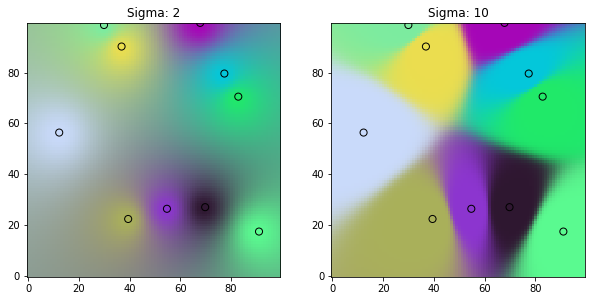

In [5]:
from matplotlib import pyplot

# generate data
nodes = numpy.random.random((10, 2))
values = numpy.random.random((10, 3))

# create NxN grid
N = 100
ti = numpy.linspace(0, 1, N)

# create plot figures
f = pyplot.figure(figsize=(10,10))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# ========
# Sigma 1
# ========
sigma = 2
data = numpy.array([idw([ti[j],ti[i]], nodes, values, sigma=sigma) for i in range(N) for j in range(N)])

ax1.title.set_text('Sigma: {}'.format(sigma))
ax1.scatter(nodes[:,0]*N, nodes[:,1]*N, s=50, c=values, edgecolor='black') # size/color
ax1.imshow(data.reshape(N,N,3), origin='lower')

# ========
# Sigma 10
# ========
sigma = 10
data = numpy.array([idw([ti[j],ti[i]], nodes, values, sigma=sigma) for i in range(N) for j in range(N)])

ax2.title.set_text('Sigma: {}'.format(sigma))
ax2.scatter(nodes[:,0]*N, nodes[:,1]*N, s=50, c=values, edgecolor='black') # size/color
ax2.imshow(data.reshape(N,N,3), origin='lower')


Text(0.5,0,'Z')

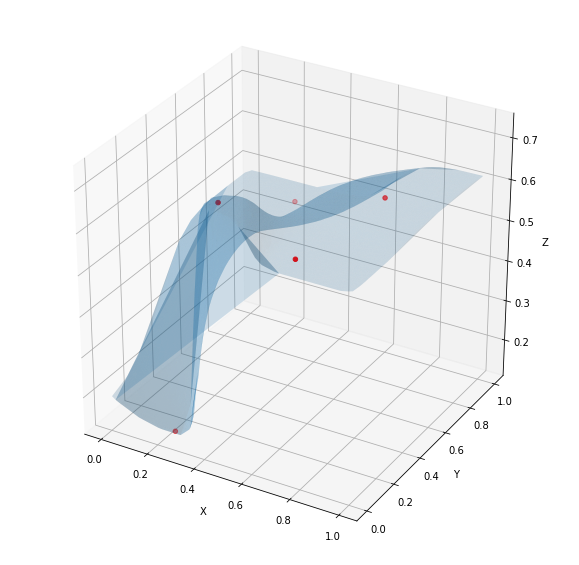

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

# generate data
nodes = numpy.random.random((5, 3))

# triangulate plane (5k points)
N = 5000
x = numpy.random.random(N)
y = numpy.random.random(N)
triang = Triangulation(x, y)

# interpolate data
sigma = 5
z = numpy.array([idw([x[i], y[i]], nodes[:,:2], nodes[:,2], sigma=sigma) for i in range(N)])

fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')

#z = numpy.zeros(N)
ax.plot_trisurf(x, y, z, triangles=triang.triangles, alpha=0.2, edgecolor=None)
ax.scatter(nodes[:,0], nodes[:,1], nodes[:,2], c='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
